### __In this Project we will be working with a dataset from University of California, Irvine's website. We will try to predict the total number of bikes people rented in a given hour. To accomplish this, we will create a few different machine learning models and evaluate their performance.__

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./bike_rental_hour.csv')

In [3]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
print df.shape
print df.isnull().any().sum()

(17379, 17)
0


This dataset contains 17379 rows and 17 columns, with each row representing the number of bike rentals for a single hour of a single day and this dataset has no missing values, which is good as our goal for this project is to focus more on improving machine learning models accuracy. <br>
We will predict __cnt__ column using all other columns. <br>
So lets just check the distribution of target column.

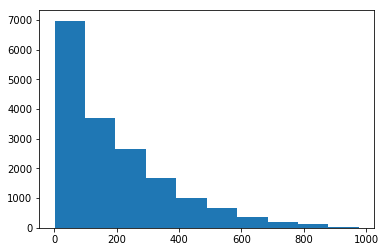

In [5]:
plt.hist(df.cnt);

Lets just check how other columns correlate to our target column.

In [6]:
df.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

Feature Engineering: Feature can enhance the accuracy of models by introducing new information, or distilling esisting information.
For ex: __hr__ column contains the hours during which bikes are rented, A machine will treat each hour differently, without understanding that certain hours are related. we will create new column with label __morning__(1), __afternoon__(2), __evening__(3) and __night__(4). This will bundle similar times together, and enabling model to make prediction. we can do similar engineering with other columns too.

In [7]:
def assign_label(hour):
    if   (hour >= 6) & (hour <= 12):
        return 1
    elif (hour >= 12 ) & (hour <= 18):
        return 2
    elif (hour >= 18 ) & (hour <= 24):
        return 3
    else:
        return 4
df['time_label'] = df.hr.apply(assign_label)

In [8]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4


In [9]:
df.time_label.value_counts()

1    5088
2    4375
4    4276
3    3640
Name: time_label, dtype: int64

__Below we will represent correlation matrix using heatmap and using Fancy Pandas Style__

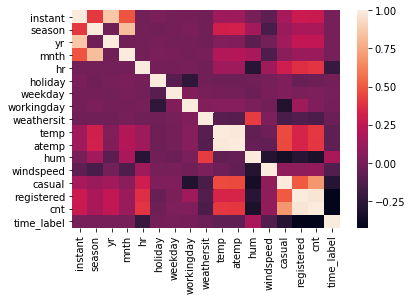

In [10]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns);

In [11]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
instant,1,0.4,0.87,0.49,-0.0048,0.015,0.0014,-0.0034,-0.014,0.14,0.14,0.0096,-0.075,0.16,0.28,0.28,0.0069
season,0.4,1,-0.011,0.83,-0.0061,-0.0096,-0.0023,0.014,-0.015,0.31,0.32,0.15,-0.15,0.12,0.17,0.18,0.0068
yr,0.87,-0.011,1,-0.01,-0.0039,0.0067,-0.0045,-0.0022,-0.019,0.041,0.039,-0.084,-0.0087,0.14,0.25,0.25,0.0049
mnth,0.49,0.83,-0.01,1,-0.0058,0.018,0.01,-0.0035,0.0054,0.2,0.21,0.16,-0.14,0.068,0.12,0.12,0.006
hr,-0.0048,-0.0061,-0.0039,-0.0058,1,0.00048,-0.0035,0.0023,-0.02,0.14,0.13,-0.28,0.14,0.3,0.37,0.39,-0.22
holiday,0.015,-0.0096,0.0067,0.018,0.00048,1,-0.1,-0.25,-0.017,-0.027,-0.031,-0.011,0.004,0.032,-0.047,-0.031,-0.00071
weekday,0.0014,-0.0023,-0.0045,0.01,-0.0035,-0.1,1,0.036,0.0033,-0.0018,-0.0088,-0.037,0.012,0.033,0.022,0.027,0.0023
workingday,-0.0034,0.014,-0.0022,-0.0035,0.0023,-0.25,0.036,1,0.045,0.055,0.055,0.016,-0.012,-0.3,0.13,0.03,-0.00097
weathersit,-0.014,-0.015,-0.019,0.0054,-0.02,-0.017,0.0033,0.045,1,-0.1,-0.11,0.42,0.026,-0.15,-0.12,-0.14,-0.036
temp,0.14,0.31,0.041,0.2,0.14,-0.027,-0.0018,0.055,-0.1,1,0.99,-0.07,-0.023,0.46,0.34,0.4,-0.076


Few of our columns are highly correlated for example: temp and atemp.

We are going to select 80% of the rows in df to be a part of training set, and 20% for out testing set but here we are only selecting rows that are not in training set.

In [12]:
train = df.sample(frac = .8)
test  = df.loc[~df.index.isin(train.index)]

In [13]:
print 'Training dataset shape: ', train.shape
print 'Testing dataset shape: ', test.shape

Training dataset shape:  (13903, 18)
Testing dataset shape:  (3476, 18)


In [14]:
X = train.drop(['cnt', 'casual', 'dteday', 'registered'], axis = 1 )
y = train.cnt
X_test = test.drop(['cnt', 'casual', 'dteday', 'registered'], axis = 1 )
y_test = test.cnt

## _Using Linear Reg._

In [15]:
lr = LinearRegression()
lr.fit(X, y)

predictions = lr.predict(X_test)
np.mean((predictions - y_test) ** 2)

17466.205446683492

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## _Using Decision Tree_

In [16]:
# Using Decision tree
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

predictions = dtr.predict(X_test)
np.mean((predictions - y_test) ** 2)

3514.2465477560413

In [17]:
#min_sample_lead = 5
# Using Decision tree
dtr = DecisionTreeRegressor(min_samples_leaf= 5)
dtr.fit(X, y)

predictions = dtr.predict(X_test)
np.mean((predictions - y_test) ** 2)

2594.595563296473

Using Nonlinear Predictor __"Decision Tree Regressor"__ we have much higher accuracy than linear regression model.

## _Using Random Forest Algorithm._

In [18]:
rf = RandomForestRegressor()
rf.fit(X, y)
predictions = rf.predict(X_test)
np.mean((predictions - y_test) ** 2)

1847.1789298043725

In [19]:
#using min_sample_leaf = 2
rf = RandomForestRegressor(min_samples_leaf= 2)
rf.fit(X, y)
predictions = rf.predict(X_test)
np.mean((predictions - y_test) ** 2)

1789.0297458787647

Lets try to tune our model

In [20]:
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

rf_params = {'n_estimators':[10, 25, 50], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid=rf_params, verbose=1, cv=cv)
grid_rf.fit(X,y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/lucky/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   52.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=21, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 25, 50], 'min_samples_split': [2, 5, 10], 'max_depth': [3, 5, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
grid_rf.best_score_


pred = grid_rf.predict(X_test)
print np.mean((pred - y_test) ** 2)

1619.45480856


Using Random Forest algorithm, which improves on the Decision tree algorithm we had higher accuracy than Decision Tree. Random Foresets tend to be much more accurate than simple models like linear regression. They also tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so It's important to tune paraments like maximum depth and minimum sample x leaf.

__Its possible to further improve our accuracy using grid search and gradient boost machine learning algorithms suchs as: XGboost, catboost etc. below we will try catboost. An open source machine learning gradient boost by Yandex.__

In [22]:
from catboost import CatBoostRegressor

In [42]:
wild_cat = CatBoostRegressor(depth = 5, logging_level= 1)
wild_cat.fit(X, y, verbose=0)


CatboostError: library/json/writer/json_value.cpp:463: Not a string

In [28]:
predictions = wild_cat.predict(X_test)
np.mean((predictions - y_test) ** 2)

1247.6145898402979

### __We jumped from MSE of 16290 to MSE of ~1250 by using different machine learning algorithms.__